## **Setup and Load Data**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [27]:
df = pd.read_csv('final.csv')

In [28]:
df.head()

Date  Spread    Mcap     P/B      P/E   Close  Volatility  30y_yield  \
0  1990-01-05    0.97     NaN     NaN  15.1200  352.20       11.92      8.056   
1  1990-01-12    0.95     NaN     NaN  14.6600  339.93       14.44      8.171   
2  1990-01-19    0.95     NaN     NaN  14.2400  339.15       14.67      8.270   
3  1990-01-26    0.95     NaN     NaN  13.9400  325.80       16.41      8.522   
4  1990-02-02    0.95  1.734M  2.0013  13.8364  330.92       16.93      8.510   

   AA Yield  Mkt_rf   smb   hml     rf  Yield  3m  Inflation  
0      8.89   -0.23  1.25 -0.76  0.141   3.17 NaN        4.6  
1      8.92   -3.56  0.51  0.61  0.141    NaN NaN        NaN  
2      8.98   -0.47 -0.28 -0.19  0.141    NaN NaN        NaN  
3      9.05   -4.21 -0.25  0.82  0.141    NaN NaN        NaN  
4      9.15    1.22 -1.74 -0.07  0.142   3.28 NaN        5.2

**Adding Date as Index and sorting by Date**

In [29]:
df.set_index('Date', inplace=True)

In [30]:
df = df.sort_index()
df.head()

Spread    Mcap     P/B      P/E   Close  Volatility  30y_yield  \
Date                                                                         
1990-01-05    0.97     NaN     NaN  15.1200  352.20       11.92      8.056   
1990-01-12    0.95     NaN     NaN  14.6600  339.93       14.44      8.171   
1990-01-19    0.95     NaN     NaN  14.2400  339.15       14.67      8.270   
1990-01-26    0.95     NaN     NaN  13.9400  325.80       16.41      8.522   
1990-02-02    0.95  1.734M  2.0013  13.8364  330.92       16.93      8.510   

            AA Yield  Mkt_rf   smb   hml     rf  Yield  3m  Inflation  
Date                                                                   
1990-01-05      8.89   -0.23  1.25 -0.76  0.141   3.17 NaN        4.6  
1990-01-12      8.92   -3.56  0.51  0.61  0.141    NaN NaN        NaN  
1990-01-19      8.98   -0.47 -0.28 -0.19  0.141    NaN NaN        NaN  
1990-01-26      9.05   -4.21 -0.25  0.82  0.141    NaN NaN        NaN  
1990-02-02      9.15    1.22 -1.74 -0.07  0.142   3.28 NaN        5.2

## **Descriptive Statistics for dataset columns**

In [31]:
# Printing datatypes
df.dtypes

Spread        float64
Mcap           object
P/B           float64
P/E           float64
Close         float64
Volatility    float64
30y_yield     float64
AA Yield      float64
Mkt_rf        float64
smb           float64
hml           float64
rf            float64
Yield         float64
3m            float64
Inflation     float64
dtype: object

In [32]:
df.describe()

Spread          P/B          P/E        Close   Volatility  \
count  1700.000000  1711.000000  1715.000000  1715.000000  1715.000000   
mean      0.950482     2.989648    20.124921  1494.262111    15.915201   
std       0.379102     0.793049     4.143484   987.811321     9.681618   
min       0.520000     1.528500    11.176600   300.030000     3.410000   
25%       0.710000     2.434000    17.068400   879.430000    10.040000   
50%       0.880000     2.818200    19.208100  1248.290000    13.410000   
75%       1.050000     3.372650    22.861950  1933.875000    19.010000   
max       3.470000     5.236100    32.365100  4766.180000    87.980000   

         30y_yield     AA Yield       Mkt_rf          smb          hml  \
count  1715.000000  1700.000000  1704.000000  1704.000000  1704.000000   
mean      4.785009     5.676435     0.161684     0.019384     0.040194   
std       1.853189     1.815069     2.378997     1.361766     1.581656   
min       1.169600     2.030000   -18.000000   -10.050000    -8.940000   
25%       3.093150     4.010000    -1.060000    -0.752500    -0.712500   
50%       4.717000     5.510000     0.280000     0.050000    -0.010000   
75%       6.057500     7.210000     1.452500     0.800000     0.732500   
max       9.155000     9.630000    12.610000     6.970000    10.850000   

                rf        Yield           3m   Inflation  
count  1704.000000  1080.000000  1670.000000  395.000000  
mean      0.051867     2.015370     2.438008    2.635949  
std       0.046834     0.419469     2.145520    1.617833  
min      -0.001000     1.110000    -0.018000   -2.100000  
25%       0.003000     1.820000     0.150000    1.700000  
50%       0.041000     2.000000     1.906000    2.500000  
75%       0.098000     2.150000     4.692250    3.200000  
max       0.171000     3.880000     7.361000    9.100000

In [33]:
# Null values
df.isna().sum()

Spread          16
Mcap             5
P/B              5
P/E              1
Close            1
Volatility       1
30y_yield        1
AA Yield        16
Mkt_rf          12
smb             12
hml             12
rf              12
Yield          636
3m              46
Inflation     1321
dtype: int64

In [34]:
# number of duplicate rows
df.duplicated().sum()

0

## Data Cleaning

Cleaning data based on above observations. 

In [36]:
# First make copies of data for volatility and Excess Return predictions

# For Volatility
vol_df = df.copy()
# Add lagged values
lagged_data = []
for i in range(1,10):
    col_label = "Volshift" + str(i)
    vol_df[col_label] = vol_df['Volatility'].shift(i)
    lagged_data.append(col_label)
vol_df.dropna(subset = lagged_data, inplace = True)

# Forward fill missing values
vol_df.ffill(inplace = True)
vol_df.dropna(inplace = True)


# For Excess Return
ret_df = df.copy()
ret_df.dropna(subset = ['Mkt_rf'], inplace = True)
ret_df['Mkt_rf_shift'] = ret_df['Mkt_rf'].shift(1)
ret_df.ffill(inplace = True)

In [37]:
# function to covert Mcap value from object datatype to Float
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0

In [38]:
# Fix Mcap column
df['Mcap'] = df['Mcap'].apply(value_to_float)

In [39]:
# Dropping rows with null volatility
df.dropna(subset = ['Volatility'], inplace = True)
df['Volatility'].isna().sum()

0

## **Data Visualization**

In [40]:
# some setup
pd.set_option('display.max_rows', 500)
plt.style.use("ggplot")

Now we look for coorelation between the target variables and features through various plots.

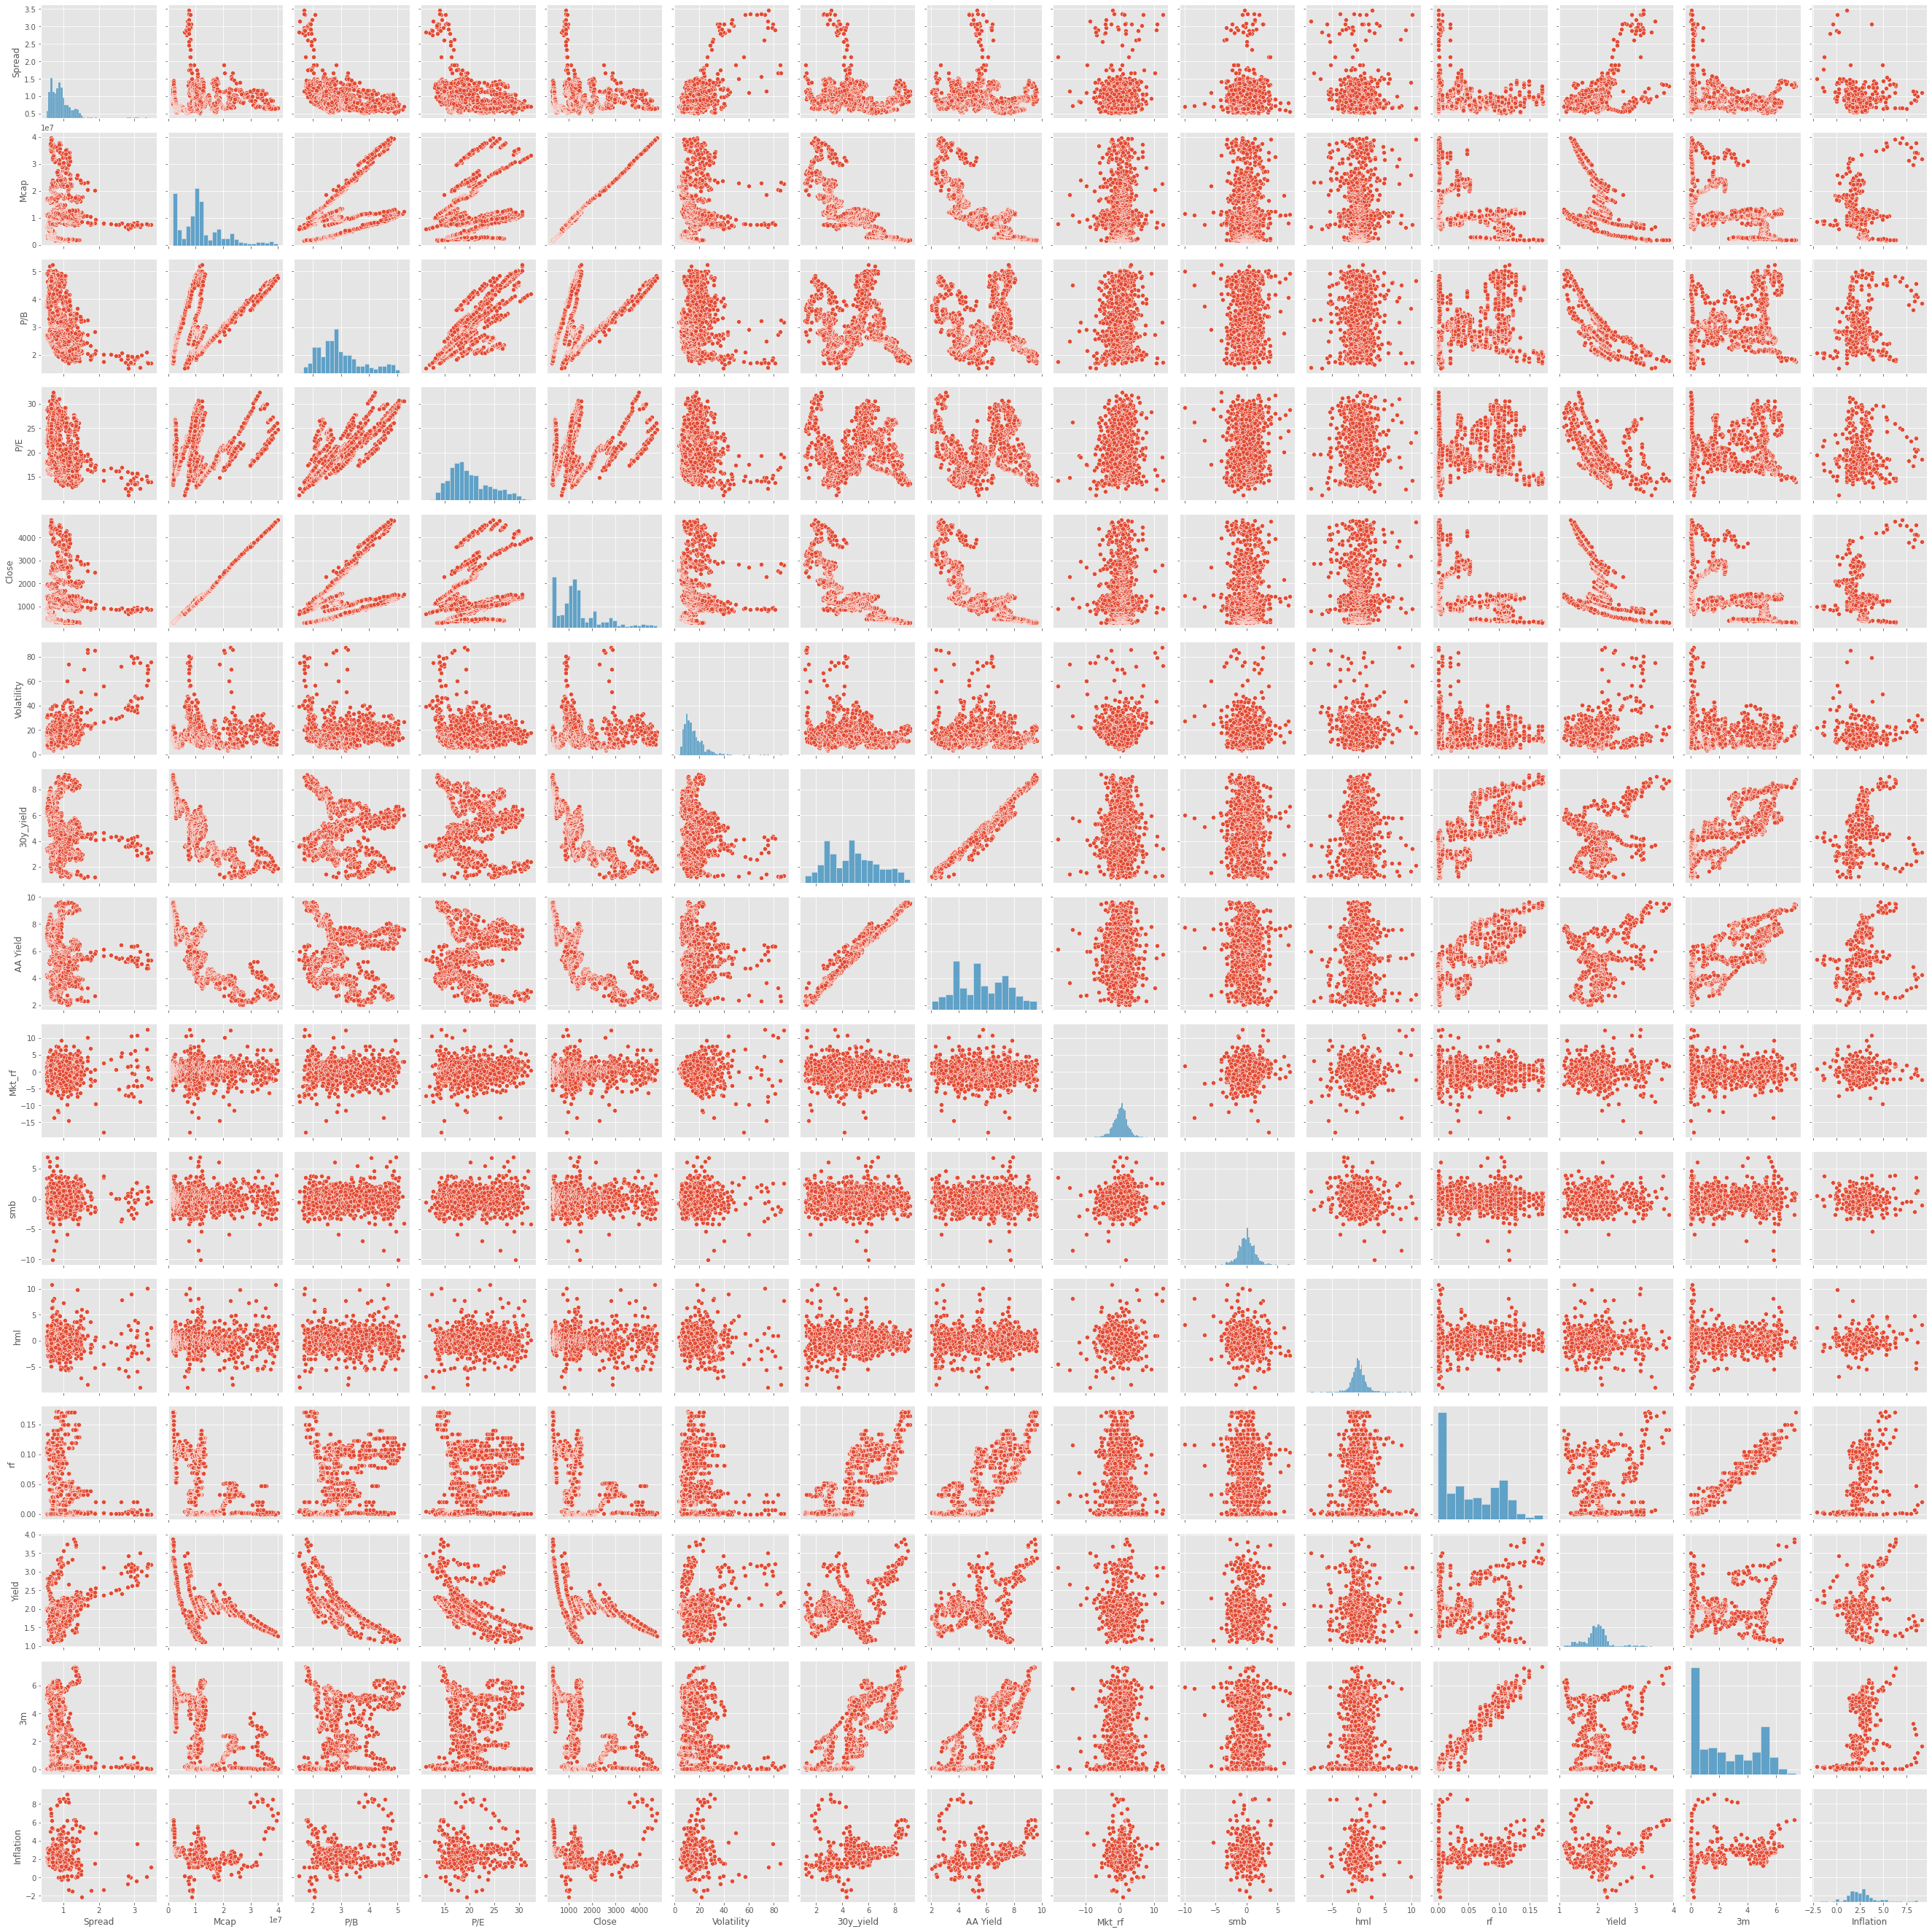

In [41]:
sns.pairplot(df)

In above scatterplots we can see correlation between our target variables ie 'Volatility' and 'Mkt_rf' to other features. In most of the cases the coorelation is not very clear just by visual inspection. We will take up example below -

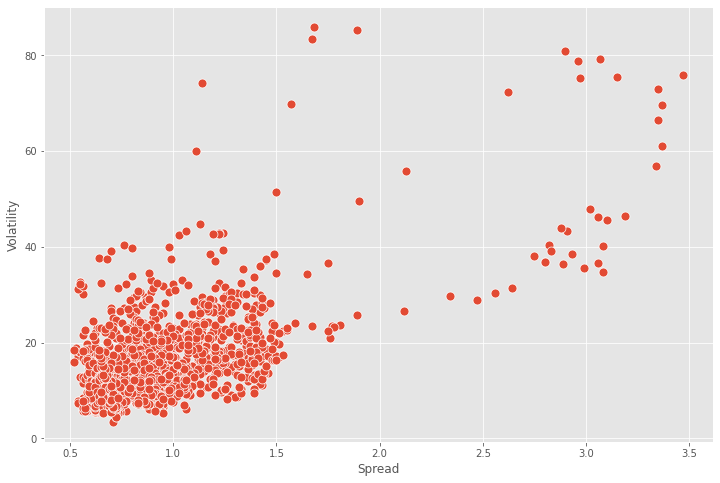

In [42]:
rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x="Spread", y="Volatility", data=df, palette="Dark2", s=80)

Above we can see positive correlation between Volatility and Spread, which indicates we can use Spread as a feature to predict volatility. 

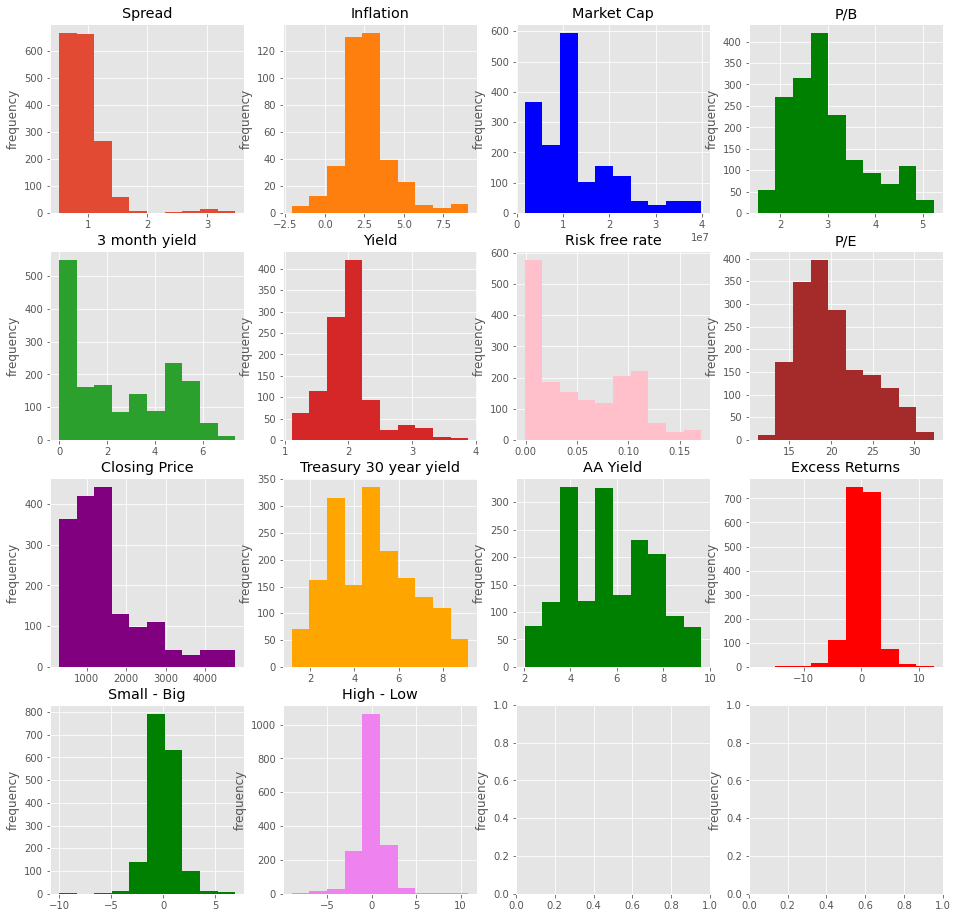

In [43]:
# Visializing the frequency charts for each feature to get some idea about distibution of values
rcParams['figure.figsize'] = (16,  16)
fig, axs = plt.subplots(4, 4)
axs[0, 0].hist(df['Spread'])
axs[0, 0].set_title('Spread')
axs[0, 1].hist(df['Inflation'], color='tab:orange')
axs[0, 1].set_title('Inflation')
axs[0, 2].hist(df['Mcap'], color='blue')
axs[0, 2].set_title('Market Cap')
axs[0, 3].hist(df['P/B'], color='green')
axs[0, 3].set_title('P/B')
axs[1, 0].hist(df['3m'], color='tab:green')
axs[1, 0].set_title('3 month yield')
axs[1, 1].hist(df['Yield'], color='tab:red')
axs[1, 1].set_title('Yield')
axs[1, 2].hist(df['rf'], color='pink')
axs[1, 2].set_title('Risk free rate')
axs[1, 3].hist(df['P/E'], color='brown')
axs[1, 3].set_title('P/E')
axs[2, 0].hist(df['Close'], color='purple')
axs[2, 0].set_title('Closing Price')
axs[2, 1].hist(df['30y_yield'], color='orange')
axs[2, 1].set_title('Treasury 30 year yield')
axs[2, 2].hist(df['AA Yield'], color='green')
axs[2, 2].set_title('AA Yield')
axs[2, 3].hist(df['Mkt_rf'], color='red')
axs[2, 3].set_title('Excess Returns')
axs[3, 0].hist(df['smb'], color='green')
axs[3, 0].set_title('Small - Big')
axs[3, 1].hist(df['hml'], color='violet')
axs[3, 1].set_title('High - Low')

for ax in axs.flat:
    ax.set(ylabel='frequency')

## **Time Series Analysis**

In [44]:
import sys
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

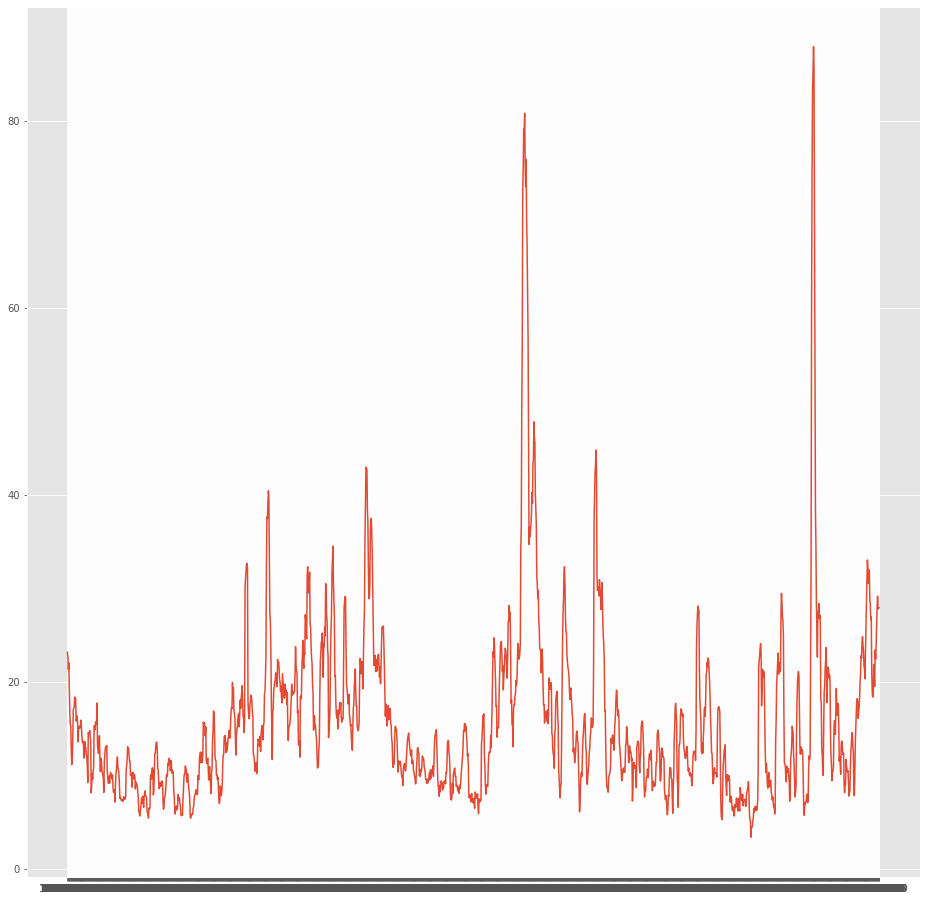

In [45]:
# Plotting Volatility value over time
plt.plot(vol_df['Volatility'])

**Plotting Partial Autocorrelation Graphs** 

This will help us identify what amount of lag values can we use to predict current volatility. 

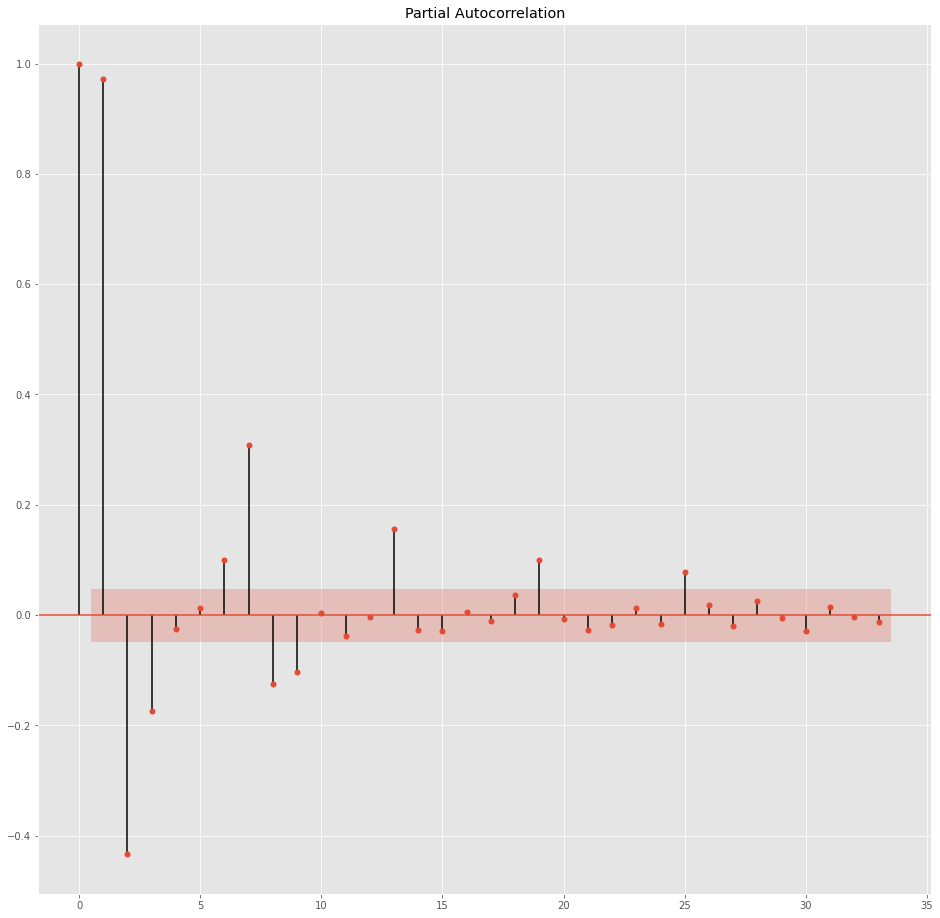

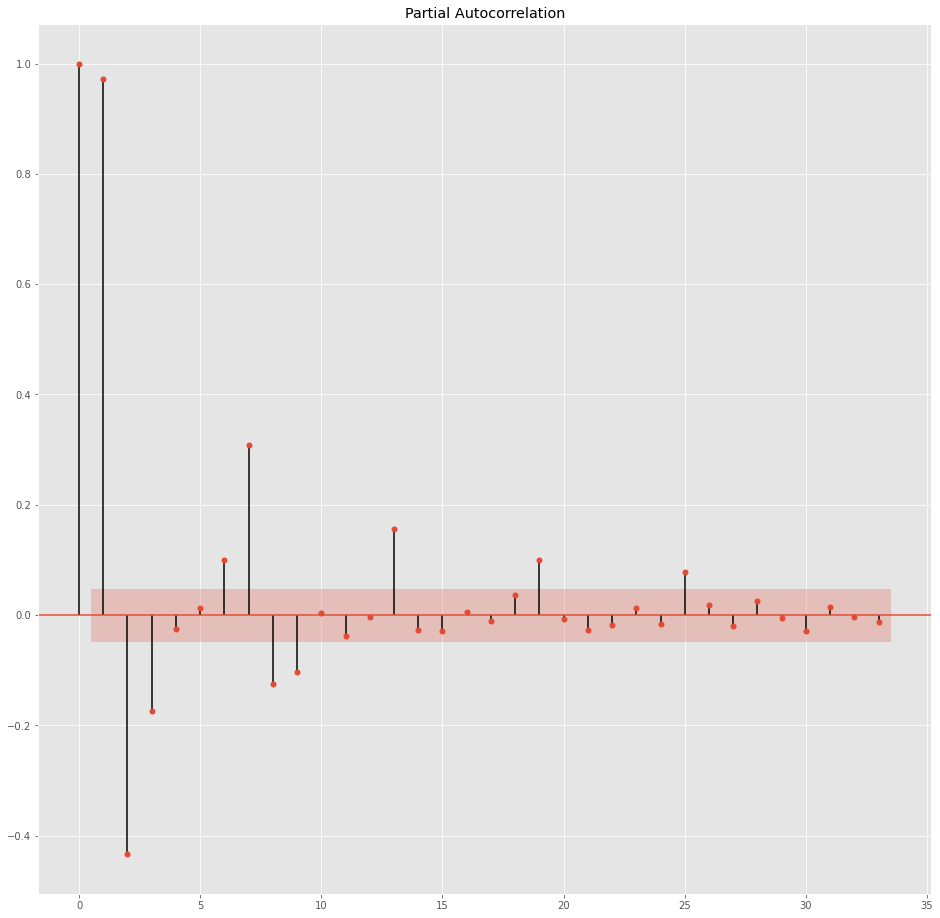

In [47]:
plot_pacf(vol_df['Volatility'], method = 'ywm')

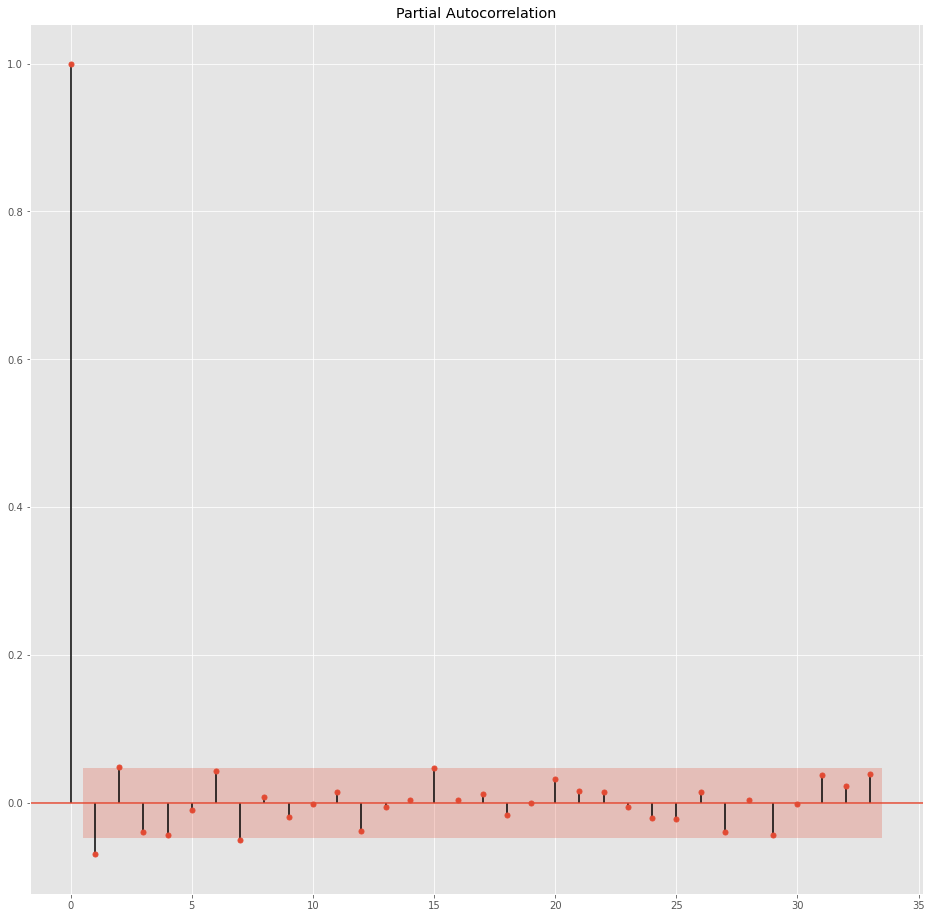

In [48]:
plot_pacf(ret_df['Mkt_rf'], method = 'ywm');